In [7]:
import pandas as pd
import numpy as np

df_uts = pd.read_csv(r'C:\Users\LENOVO LEGION\Videos\TubesML\Dataset UTS_Gasal 2425.csv')

df_uts.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [8]:
print("data null \n",df_uts.isnull().sum())
print("\ndata kosong \n",df_uts.empty)
print("\ndata nan \n",df_uts.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

data kosong 
 False

data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64


In [9]:
target = 'category'
features_to_drop = ['price']
X = df_uts.drop(columns=features_to_drop)
y = df_uts[target]

In [10]:
X = pd.get_dummies(X, drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

In [12]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)


pipe_RF = [
    ('data scaling', StandardScaler()),
    ('feature select', SelectKBest()),
    ('clf', RandomForestClassifier(random_state=99, class_weight='balanced'))
]


params_grid_RF = [{
    'data scaling': [StandardScaler()],
    'feature select__k': np.arange(2, 6),
    'clf__max_depth': np.arange(4, 5),
    'clf__n_estimators': [100, 150]
},
{
    'data scaling': [StandardScaler()],
    'feature select': [SelectPercentile()],
    'feature select__percentile': np.arange(20, 50),
    'clf__max_depth': np.arange(4, 5),
    'clf__n_estimators': [100, 150]
},
{
    'data scaling': [MinMaxScaler()],
    'feature select__k': np.arange(2, 6),
    'clf__max_depth': np.arange(4, 5),
    'clf__n_estimators': [100, 150]
},
{
    'data scaling': [MinMaxScaler()],
    'feature select': [SelectPercentile()],
    'feature select__percentile': np.arange(20, 50),
    'clf__max_depth': np.arange(4, 5),
    'clf__n_estimators': [100, 150]
}
]


estimator_RF = Pipeline(pipe_RF)


GSCV_RF = GridSearchCV(estimator_RF, params_grid_RF, cv=SKF, n_jobs=-1)
GSCV_RF.fit(X_train, y_train)

print("GSCV training finished for Random Forest")


GSCV training finished for Random Forest


CV Score: 1.0
Test Score: 0.9255
Best model: Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=2)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        random_state=99))])
Best features: Index(['squaremeters', 'category_Luxury'], dtype='object')

Classification Report for Random Forest:
               precision    recall  f1-score   support

       Basic       0.85      1.00      0.92       869
      Luxury       1.00      1.00      1.00       613
      Middle       1.00      0.71      0.83       518

    accuracy                           0.93      2000
   macro avg       0.95      0.90      0.92      2000
weighted avg       0.94      0.93      0.92      2000



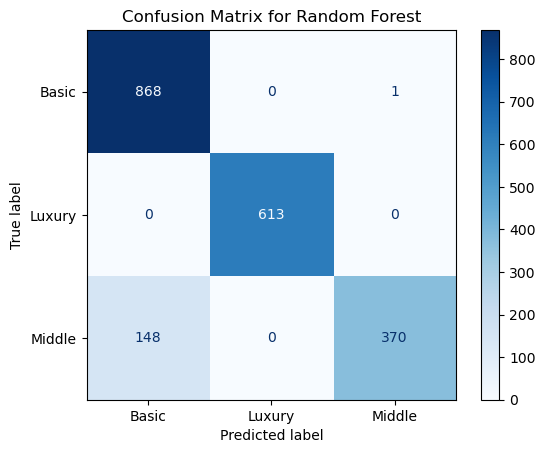


Selected features for Random Forest: ['squaremeters', 'category_Luxury']



In [13]:
print("CV Score: {}".format(GSCV_RF.best_score_))
print("Test Score: {}".format(GSCV_RF.best_estimator_.score(X_test, y_test)))
print("Best model:", GSCV_RF.best_estimator_)


mask = GSCV_RF.best_estimator_.named_steps['feature select'].get_support()
print("Best features:", X.columns[mask])

RF_pred = GSCV_RF.predict(X_test)

print(f"\nClassification Report for Random Forest:\n", classification_report(y_test, RF_pred))


cm_RF = confusion_matrix(y_test, RF_pred)
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=GSCV_RF.classes_)


disp_RF.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()


feature_selector_RF = GSCV_RF.best_estimator_.named_steps['feature select']
selected_features_RF = feature_selector_RF.get_support(indices=True)
feature_names_RF = X.columns[selected_features_RF]

print(f"\nSelected features for Random Forest: {feature_names_RF.tolist()}\n")


In [14]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)

pipe_LR = [
    ('data scaling', StandardScaler()),
    ('feature select', SelectKBest()),
    ('clf', LogisticRegression(random_state=99, class_weight='balanced', max_iter=1000))
]

params_grid_LR = [{
    'data scaling': [StandardScaler()],
    'feature select__k': np.arange(2, 6),
    'clf__C': [0.01, 0.1, 1, 10, 100]
},
{
    'data scaling': [StandardScaler()],
    'feature select': [SelectPercentile()],
    'feature select__percentile': np.arange(20, 50),
    'clf__C': [0.01, 0.1, 1, 10, 100]
},
{
    'data scaling': [MinMaxScaler()],
    'feature select__k': np.arange(2, 6),
    'clf__C': [0.01, 0.1, 1, 10, 100]
},
{
    'data scaling': [MinMaxScaler()],
    'feature select': [SelectPercentile()],
    'feature select__percentile': np.arange(20, 50),
    'clf__C': [0.01, 0.1, 1, 10, 100]
}
]


estimator_LR = Pipeline(pipe_LR)


GSCV_LR = GridSearchCV(estimator_LR, params_grid_LR, cv=SKF, n_jobs=-1)
GSCV_LR.fit(X_train, y_train)

print("GSCV training finished for Logistic Regression")

GSCV training finished for Logistic Regression


CV Score: 1.0
Test Score: 0.8405
Best model: Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=2)),
                ('clf',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=99))])
Best features: Index(['squaremeters', 'category_Luxury'], dtype='object')

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

       Basic       0.85      0.77      0.81       869
      Luxury       1.00      1.00      1.00       613
      Middle       0.67      0.77      0.71       518

    accuracy                           0.84      2000
   macro avg       0.84      0.85      0.84      2000
weighted avg       0.85      0.84      0.84      2000



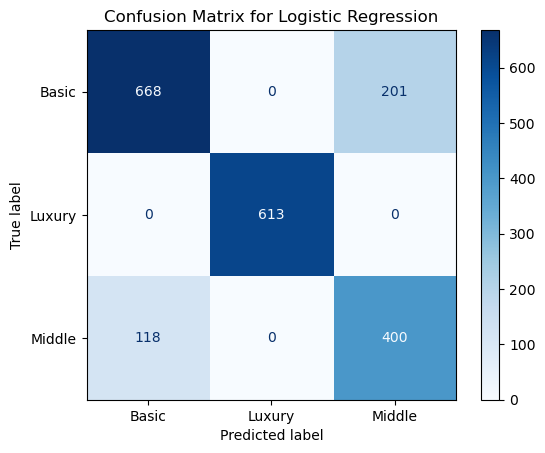


Selected features for Logistic Regression: ['squaremeters', 'category_Luxury']



In [15]:

print("CV Score: {}".format(GSCV_LR.best_score_))
print("Test Score: {}".format(GSCV_LR.score(X_test, y_test)))

print("Best model:", GSCV_LR.best_estimator_)

feature_selector_LR = GSCV_LR.best_estimator_.named_steps['feature select']
mask = feature_selector_LR.get_support()
print("Best features:", X.columns[mask])


LR_pred = GSCV_LR.predict(X_test)


print(f"\nClassification Report for Logistic Regression:\n", classification_report(y_test, LR_pred))

cm_LR = confusion_matrix(y_test, LR_pred)
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=GSCV_LR.classes_)

disp_LR.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

selected_features_LR = feature_selector_LR.get_support(indices=True)
feature_names_LR = X.columns[selected_features_LR]

print(f"\nSelected features for Logistic Regression: {feature_names_LR.tolist()}\n")